In [1]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# Institution: Quant Coding Versity Academy
# Date: December 25, 2024
#
# ==========================================================
# Lesson: Advanced Model Analysis and Visualization in Deep Learning
#         with Keras API: Binary Classification Case Study
# ==========================================================
# ## Learning Objectives
# This guide will enable you to:
# 1. Analyze training history and model performance metrics
# 2. Create advanced visualizations for model evaluation
# 3. Perform gap analysis between training and validation
# 4. Export and document model training results
# =======================================================================
#          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [2]:
# ==================================================== #
#        Load Required Libraries
# ==================================================== #

import os  
from pathlib import Path
from pprint import pprint                    
# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"  


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             roc_curve,
                             auc,
                             precision_recall_curve
                            )

import tensorflow as tf

# Set styling for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

# Global Config
SAVE_HISTORY = False

Author: Dr. Saad Laouadi

Last updated: 2024-12-25

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
pandas    : 2.2.2
sklearn   : 1.5.1
seaborn   : 0.13.2
numpy     : 1.26.4
tensorflow: 2.16.2
matplotlib: 3.9.2



In [3]:
# ==================================================== #
#        Load and Explore the data
# ==================================================== #
# Load Breast Cancer dataset from sklearn
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Quick look at the data
print("Dataset Shape:", X.shape)
print("\nFeatures:")
print(X.describe())

Dataset Shape: (569, 30)

Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.0000

In [4]:
# ==================================================== #
#        Prepare the data for model
# ==================================================== #
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101,
                                                    stratify=y)

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# ==================================================== #
#        Model Definition and Compilation
# ==================================================== #
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile with multiple metrics
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [7]:
# ==================================================== #
#        Model Training with History
# ==================================================== #
# Train the model and store history
history = model.fit(X_train_scaled, y_train,
                   validation_split=0.2,
                   epochs=50,
                   batch_size=32,
                   verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - AUC: 0.1721 - Precision: 0.5947 - Recall: 0.9586 - accuracy: 0.5823 - loss: 0.8617 - val_AUC: 0.8259 - val_Precision: 0.6333 - val_Recall: 1.0000 - val_accuracy: 0.6374 - val_loss: 0.5871
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9322 - Precision: 0.6399 - Recall: 0.9972 - accuracy: 0.6447 - loss: 0.5224 - val_AUC: 0.9861 - val_Precision: 0.7703 - val_Recall: 1.0000 - val_accuracy: 0.8132 - val_loss: 0.3842
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9889 - Precision: 0.8531 - Recall: 0.9957 - accuracy: 0.8964 - loss: 0.3669 - val_AUC: 0.9874 - val_Precision: 0.9048 - val_Recall: 1.0000 - val_accuracy: 0.9341 - val_loss: 0.2677
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9824 - Precision: 0.9221 - Recall: 0.9965 - accuracy: 0.9453 - loss: 0.2690 - val_AUC: 0.9917 - val_Precision: 0.9500 - val_Recall: 1.0000 - val_accuracy: 0.9670 - val_loss: 0.1928
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━

In [8]:
# ==================================================== #
#        Detailed History Object Analysis
# ==================================================== #
# Getting available metrics
print("Available metrics:", history.history.keys())

Available metrics: dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


In [9]:
# ==================================================== #
#        Analysis of Training History
# ==================================================== #
# Convert history to DataFrame for easy analysis
history_df = pd.DataFrame(history.history)
print(history_df.head(3))

        AUC  Precision    Recall  accuracy      loss   val_AUC  val_Precision  \
0  0.296472   0.623955  0.982456  0.618132  0.776778  0.825851       0.633333   
1  0.955286   0.656069  0.995614  0.670330  0.487624  0.986068       0.770270   
2  0.987068   0.873077  0.995614  0.906593  0.333330  0.987358       0.904762   

   val_Recall  val_accuracy  val_loss  
0         1.0      0.637363  0.587060  
1         1.0      0.813187  0.384206  
2         1.0      0.934066  0.267681  


In [10]:
# print the epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [11]:
# Add epoch numbers
history_df['epoch'] = [history.epoch[i] + 1 for i in range(len(history_df)) ]

print(history_df.head())

        AUC  Precision    Recall  accuracy      loss   val_AUC  val_Precision  \
0  0.296472   0.623955  0.982456  0.618132  0.776778  0.825851       0.633333   
1  0.955286   0.656069  0.995614  0.670330  0.487624  0.986068       0.770270   
2  0.987068   0.873077  0.995614  0.906593  0.333330  0.987358       0.904762   
3  0.991422   0.938017  0.995614  0.956044  0.234926  0.991744       0.950000   
4  0.992421   0.941909  0.995614  0.958791  0.172972  0.993292       0.950000   

   val_Recall  val_accuracy  val_loss  epoch  
0         1.0      0.637363  0.587060      1  
1         1.0      0.813187  0.384206      2  
2         1.0      0.934066  0.267681      3  
3         1.0      0.967033  0.192837      4  
4         1.0      0.967033  0.145493      5  


In [12]:
# Find best epochs for different metrics
best_acc_epoch = history_df['val_accuracy'].idxmax() + 1
best_loss_epoch = history_df['val_loss'].idxmin() + 1

print("\nBest Performance:")
print(f"Best validation accuracy at epoch {best_acc_epoch}")
print(f"Best validation loss at epoch {best_loss_epoch}")


Best Performance:
Best validation accuracy at epoch 11
Best validation loss at epoch 18


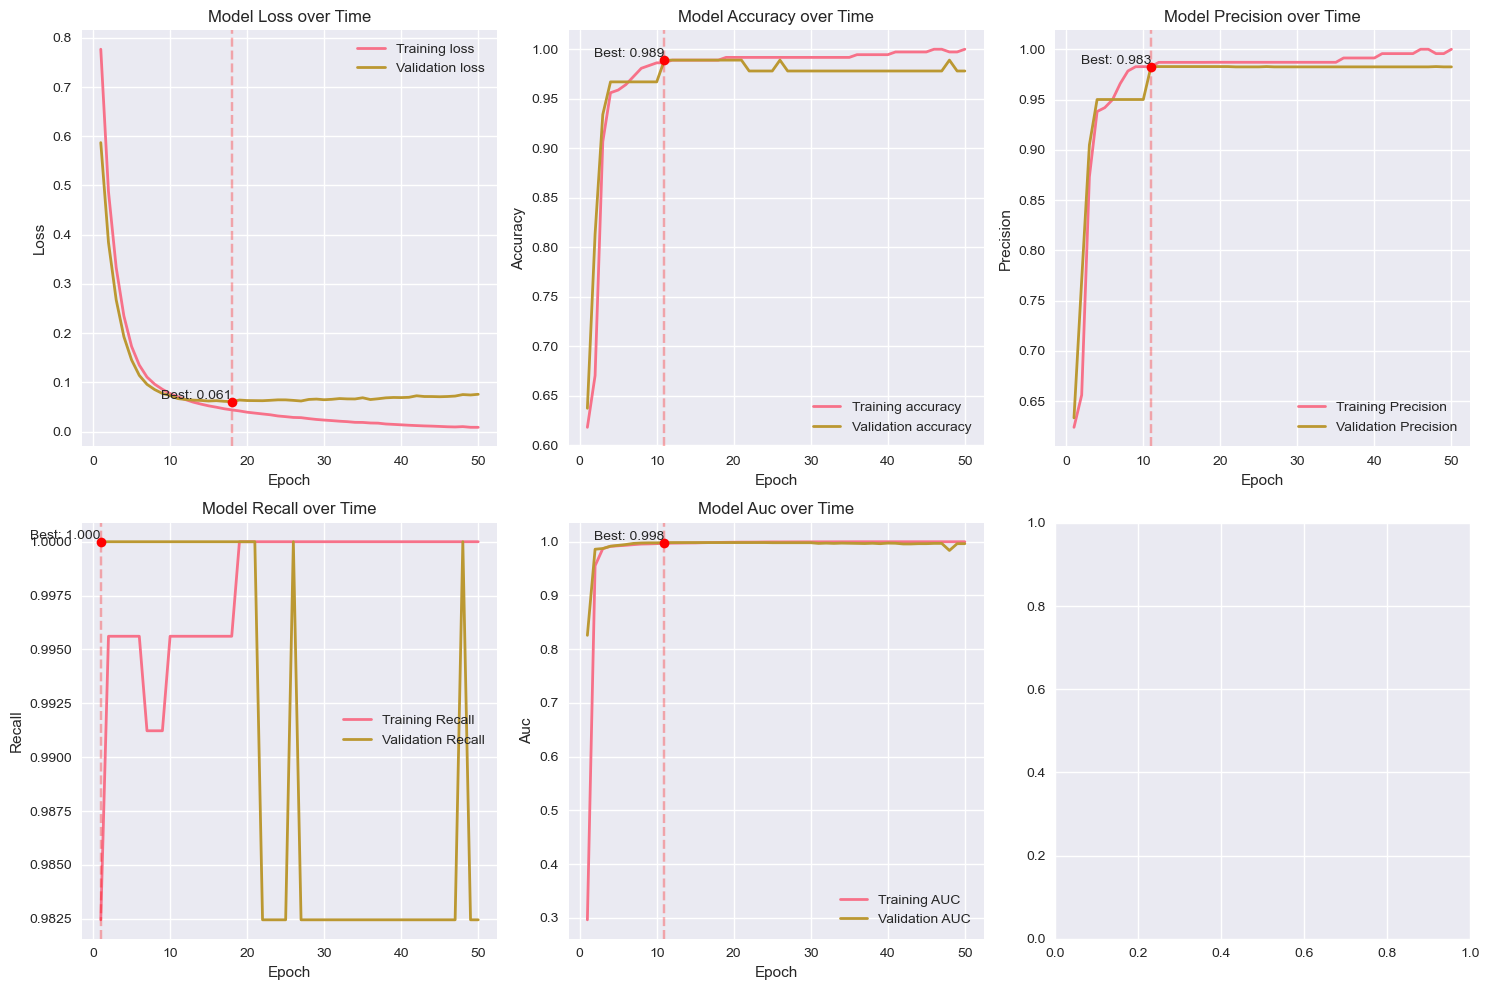

In [13]:
# ==================================================== #
#        Advanced Metrics Visualization
# ==================================================== #
# Create subplots for all metrics
metrics = ['loss', 'accuracy', 'Precision', 'Recall', 'AUC']
n_metrics = len(metrics)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    ax.plot(history_df['epoch'], history_df[metric], 
            label=f'Training {metric}', linewidth=2)
    ax.plot(history_df['epoch'], history_df[f'val_{metric}'], 
            label=f'Validation {metric}', linewidth=2)
    ax.set_title(f'Model {metric.capitalize()} over Time')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    
    # Mark best epoch
    if metric == 'loss':
        best_epoch = history_df[f'val_{metric}'].idxmin() + 1
        best_value = history_df[f'val_{metric}'].min()
    else:
        best_epoch = history_df[f'val_{metric}'].idxmax() + 1
        best_value = history_df[f'val_{metric}'].max()
        
    ax.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.3)
    ax.plot(best_epoch, best_value, 'ro')
    ax.text(best_epoch, best_value, f'Best: {best_value:.3f}',
            horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

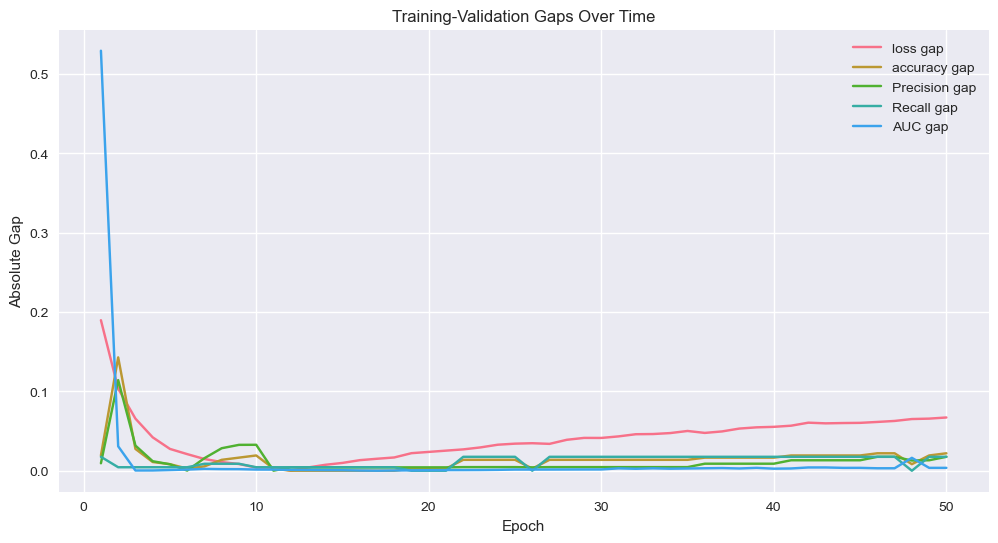

In [14]:
# ==================================================== #
#        Training-Validation Gap Analysis
# ==================================================== #
# Calculate gaps between training and validation
for metric in metrics:
    history_df[f'{metric}_gap'] = (history_df[metric] - 
                                  history_df[f'val_{metric}']).abs()
    
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(history_df['epoch'], history_df[f'{metric}_gap'], 
             label=f'{metric} gap')
plt.title('Training-Validation Gaps Over Time')
plt.xlabel('Epoch')
plt.ylabel('Absolute Gap')
plt.legend()
plt.grid(True)
plt.show()

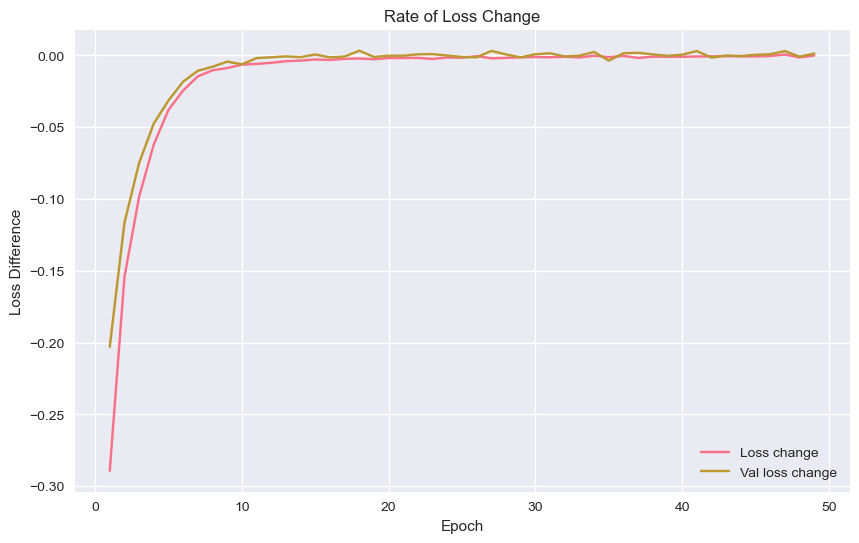

In [15]:
# ==================================================== #
#        Learning Rate Analysis
# ==================================================== #
# Plot loss vs learning rate
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'].diff(), label='Loss change')
plt.plot(history_df['val_loss'].diff(), label='Val loss change')
plt.title('Rate of Loss Change')
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# ==================================================== #
#        Export Training History
# ==================================================== #
# Save history to CSV for further analysis
if SAVE_HISTORY:
    history_df.to_csv('training_history.csv', index=False)

# Create training summary
training_summary = {
    'total_epochs': len(history_df),
    'best_val_accuracy': history_df['val_accuracy'].max(),
    'best_val_loss': history_df['val_loss'].min(),
    'final_val_accuracy': history_df['val_accuracy'].iloc[-1],
    'final_val_loss': history_df['val_loss'].iloc[-1],
    'best_accuracy_epoch': best_acc_epoch,
    'best_loss_epoch': best_loss_epoch
}

print("\nTraining Summary:")
for metric, value in training_summary.items():
    print(f"{metric}: {value}")


Training Summary:
total_epochs: 50
best_val_accuracy: 0.9890109896659851
best_val_loss: 0.060756757855415344
final_val_accuracy: 0.9780219793319702
final_val_loss: 0.07574085891246796
best_accuracy_epoch: 11
best_loss_epoch: 18
